In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np

In [53]:
df=pd.read_csv('VCB.csv',index_col='DATE')
df1=df[['CLOSE']]
df1

,CLOSE
DATE,
22/03/2024,96400.00
21/03/2024,95200.00
20/03/2024,93200.00
19/03/2024,92500.00
18/03/2024,93000.00
...,...
08/01/2021,68700.36
07/01/2021,70142.54
06/01/2021,68831.46


<Axes: xlabel='DATE'>

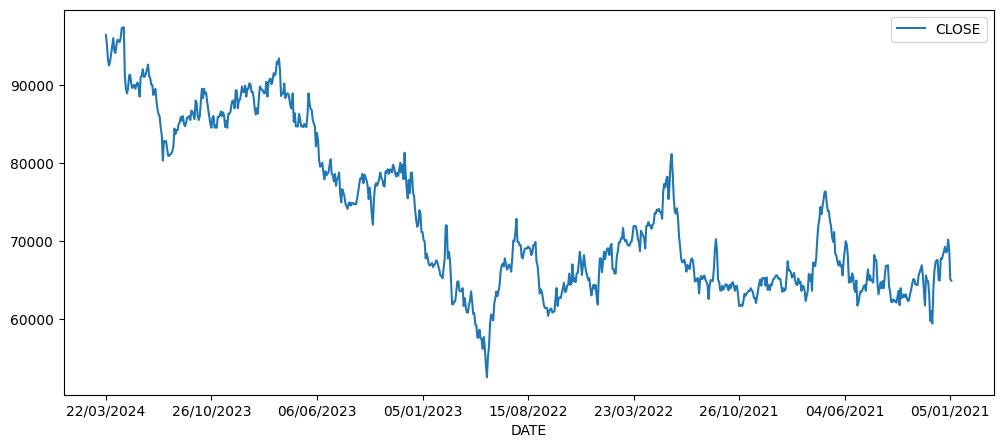

In [54]:
df1.plot(figsize=(12,5))

In [55]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [56]:
dftest=adfuller(df1,autolag='AIC')
print('1.ADF:',dftest[0])
print('2.P_VALUE:',dftest[1])
print('3.Num of lags:',dftest[2])
print('4.Num of ob:',dftest[3])
print('5.Critical value:')
for key,val in dftest[4].items():
    print("\t",key,':',val)

1.ADF: -2.0508153378450427
2.P_VALUE: 0.264746011378383
3.Num of lags: 3
4.Num of ob: 798
5.Critical value:
	 1% : -3.4385711275998583
	 5% : -2.8651686574447375
	 10% : -2.568702230639255


In [57]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [58]:
step_fit=auto_arima(df1,trace=True,suppress_warnings=True)
step_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13630.109, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13631.182, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13632.588, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13632.550, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13630.047, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13632.621, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.594 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  802
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6814.023
Date:                Sun, 28 Apr 2024   AIC                          13630.047
Time:                        13:00:22   BIC                          13634.733
Sample:                             0   HQIC                         13631.847
                                - 802                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.432e+06   5.09e+04     28.130      0.000    1.33e+06    1.53e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               126.99
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.16
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
print(df1.shape)
train=df1.iloc[:-100]
test=df1.iloc[-100:]
print(train.shape,test.shape)

(802, 1)
(702, 1) (100, 1)


In [60]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  CLOSE   No. Observations:                  702
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5942.718
Date:                Sun, 28 Apr 2024   AIC                          11887.436
Time:                        13:00:22   BIC                          11891.988
Sample:                             0   HQIC                         11889.196
                                - 702                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.35e+06   5.11e+04     26.411      0.000    1.25e+06    1.45e+06
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               115.52
Prob(Q):                              0.76   Pr

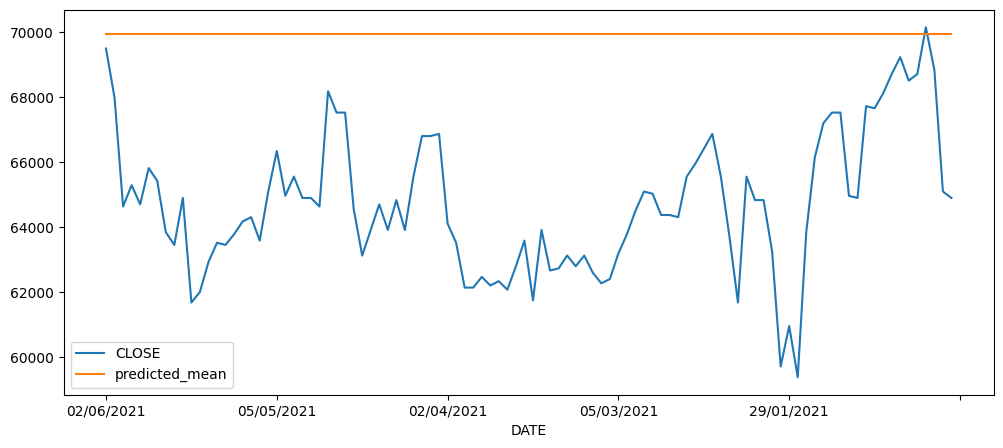

In [66]:
# Fit mô hình ARIMA
model = ARIMA(train, order=(0, 1, 0))
model_fit = model.fit()

# Dự đoán giá trị từ start đến end
start = len(train)
end = len(train) + len(test) - 1
pred = model_fit.predict(start=start, end=end)
pred.index=df1.index[start:end+1]

# Hiển thị kết quả
df1.plot(legend=True,figsize=(12,5))
pred.plot(legend=True,figsize=(12,5))
plt.show()
